In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
from tensorflow.keras.initializers import random_uniform, glorot_uniform, constant, identity
from tensorflow.keras.layers import Dropout, Input, Add, Dense, Activation, BatchNormalization, Flatten, Conv2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Model, load_model

In [ ]:
path = Path("/content/drive/MyDrive/archive.zip (Unzipped Files)/utkface_aligned_cropped/UTKFace/")
filenames = list(map(lambda x: x.name, path.glob('*.jpg')))

In [ ]:
print(len(filenames))
print(filenames[:3])

23708
['85_1_0_20170110181956588.jpg.chip.jpg', '88_1_0_20170110183145045.jpg.chip.jpg', '92_1_0_20170110183055235.jpg.chip.jpg']


In [ ]:
np.random.seed(10)
np.random.shuffle(filenames)

age_labels, image_path = [], []

for filename in filenames:
    image_path.append(filename)
    temp = filename.split('_')
    age_labels.append(temp[0])

In [ ]:
print(image_path[:5])

['55_0_3_20170119201758443.jpg.chip.jpg', '36_1_1_20170112233326423.jpg.chip.jpg', '48_1_2_20170109002813437.jpg.chip.jpg', '28_1_2_20170116165557121.jpg.chip.jpg', '1_1_3_20161220143335948.jpg.chip.jpg']


In [ ]:
df = pd.DataFrame()
df['image'], df['age'] = image_path, age_labels

In [ ]:
df.head()

,image,age
0,55_0_3_20170119201758443.jpg.chip.jpg,55
1,36_1_1_20170112233326423.jpg.chip.jpg,36
2,48_1_2_20170109002813437.jpg.chip.jpg,48
3,28_1_2_20170116165557121.jpg.chip.jpg,28
4,1_1_3_20161220143335948.jpg.chip.jpg,1


In [ ]:
df = df.astype({'age':'float32'})

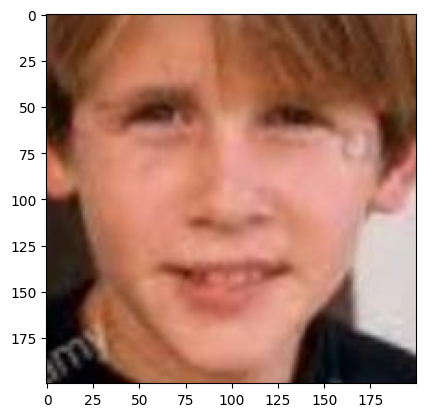

In [ ]:
#----
img = Image.open("/content/drive/MyDrive/archive.zip (Unzipped Files)/utkface_aligned_cropped/UTKFace/"+df.image[6])
plt.imshow(img)

<ipython-input-10-36725a16e635>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.age)


<Axes: xlabel='age', ylabel='Density'>

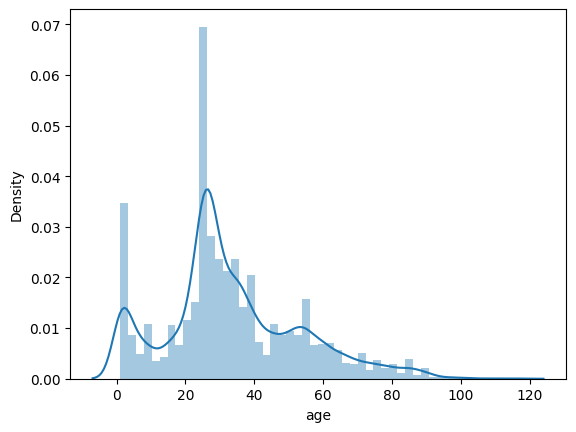

In [ ]:
sns.distplot(df.age)

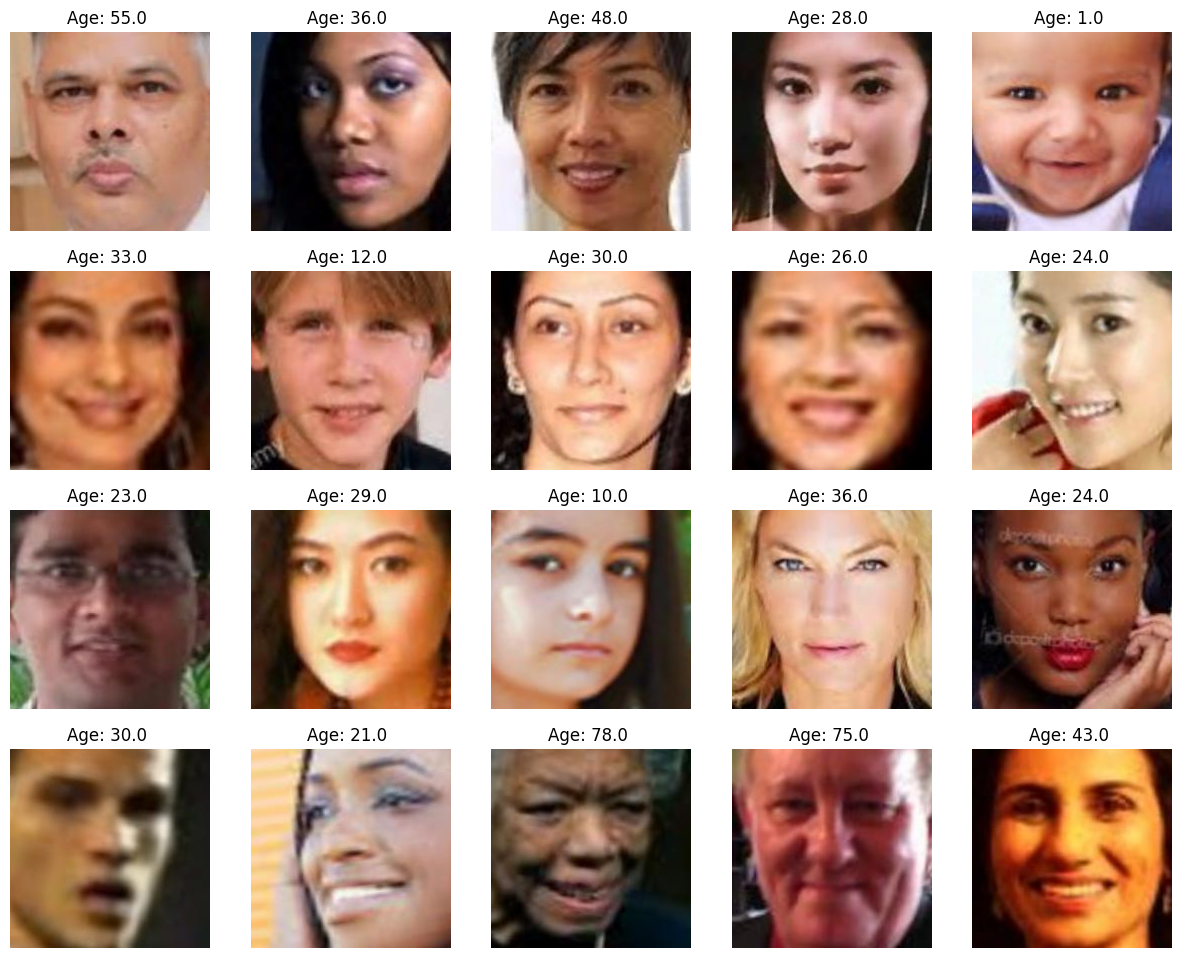

In [ ]:
files = df.iloc[0:20]
plt.figure(figsize=(15,15))
for index, file, age in files.itertuples():
    plt.subplot(5,5, index+1)
    img = load_img("/content/drive/MyDrive/archive.zip (Unzipped Files)/utkface_aligned_cropped/UTKFace/"+file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Age: {age} ")
    plt.axis('off')

In [ ]:
train, test = train_test_split(df, test_size=0.15, random_state=42)

In [ ]:
train.head()

,image,age
5045,47_0_0_20170103183440186.jpg.chip.jpg,47.0
6662,31_0_1_20170116214505667.jpg.chip.jpg,31.0
6399,35_0_0_20170117180618449.jpg.chip.jpg,35.0
8058,8_1_0_20170109204954253.jpg.chip.jpg,8.0
13570,52_0_0_20170109003616600.jpg.chip.jpg,52.0


In [ ]:
test.head()

,image,age
17525,28_0_3_20170119194436435.jpg.chip.jpg,28.0
1147,26_0_0_20170117200055853.jpg.chip.jpg,26.0
1190,18_1_0_20170109212536049.jpg.chip.jpg,18.0
9731,75_1_0_20170110182459565.jpg.chip.jpg,75.0
7387,37_0_3_20170119202410749.jpg.chip.jpg,37.0


In [ ]:
train.shape

(20151, 2)

In [ ]:
test.shape

(3557, 2)

In [ ]:
x_train = []
for file in train.image:
    img = load_img("/content/drive/MyDrive/archive.zip (Unzipped Files)/utkface_aligned_cropped/UTKFace/"+file)
    img = img.resize((128, 128), Image.ANTIALIAS)
    img = np.array(img)
    x_train.append(img)

x_train = np.array(x_train)

x_train = x_train.reshape(len(x_train), 128, 128, 3)  # Assuming RGB images

x_train.shape

x_train = x_train / 255

<ipython-input-17-6ffd30154b00>:4: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((128, 128), Image.ANTIALIAS)
<ipython-input-17-6ffd30154b00>:4: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((128, 128), Image.ANTIALIAS)
<ipython-input-17-6ffd30154b00>:4: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((128, 128), Image.ANTIALIAS)
<ipython-input-17-6ffd30154b00>:4: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((128, 128), Image.ANTIALIAS)
<ipython-input-17-6ffd30154b00>:4: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LA

In [ ]:
x_train.shape

(20151, 128, 128, 3)

In [ ]:
y_age = np.array(train.age)

In [ ]:
input_size = (128,128,3)

In [ ]:
X = Conv2D(64, (3, 3), activation='relu')(inputs)
X = BatchNormalization(axis=3)(X)
X = MaxPooling2D((3, 3))(X)

X = Conv2D(128, (3, 3), activation='relu')(X)
X = MaxPooling2D((2, 2), strides=(2, 2))(X)

X = Conv2D(256, (3, 3), activation='relu')(X)
X = MaxPooling2D((2, 2))(X)

# Flatten layer
X = Flatten()(X)

# Dense layers
dense_1 = Dense(256, activation='relu')(X)
dense_2 = Dense(256, activation='relu')(X)
dense_3 = Dense(128, activation='relu')(dense_2)

# Dropout layers
dropout_1 = Dropout(0.4)(dense_1)
dropout_2 = Dropout(0.4)(dense_3)

# Output layer for age prediction
output_2 = Dense(1, name='age_output')(dropout_2)

# Define the model
model = Model(inputs=inputs, outputs=output_2)

In [ ]:
model.compile(loss='mae', optimizer='adam', metrics=['mae'])

In [ ]:
model_history = model.fit(x=x_train, y=y_age, batch_size=10, epochs=20, validation_split=0.1)

Epoch 1/20
1814/1814 [==============================] - 19s 9ms/step - loss: 12.1402 - mae: 12.1402 - val_loss: 8.9727 - val_mae: 8.9727
Epoch 2/20
1814/1814 [==============================] - 15s 8ms/step - loss: 9.6091 - mae: 9.6091 - val_loss: 8.6936 - val_mae: 8.6936
Epoch 3/20
1814/1814 [==============================] - 15s 8ms/step - loss: 8.7605 - mae: 8.7605 - val_loss: 8.1194 - val_mae: 8.1194
Epoch 4/20
1814/1814 [==============================] - 15s 8ms/step - loss: 8.3124 - mae: 8.3124 - val_loss: 7.5277 - val_mae: 7.5277
Epoch 5/20
1814/1814 [==============================] - 15s 8ms/step - loss: 7.7838 - mae: 7.7838 - val_loss: 7.3976 - val_mae: 7.3976
Epoch 6/20
1814/1814 [==============================] - 15s 8ms/step - loss: 7.5351 - mae: 7.5351 - val_loss: 7.5810 - val_mae: 7.5810
Epoch 7/20
1814/1814 [==============================] - 15s 8ms/step - loss: 7.2205 - mae: 7.2205 - val_loss: 6.9927 - val_mae: 6.9927
Epoch 8/20
1814/1814 [==============================]

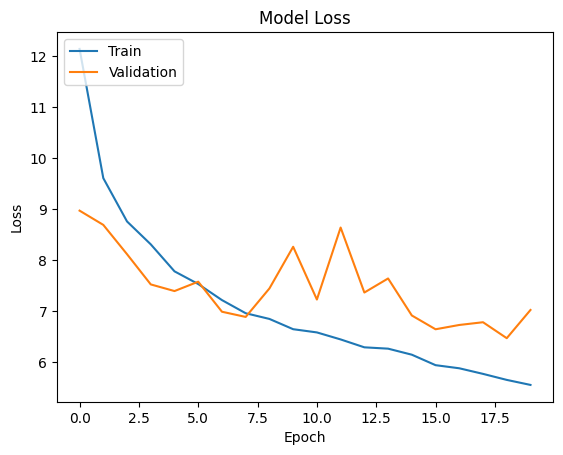

In [ ]:
# Plotting the training and validation loss over epochs
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Original Age: 28.0
1/1 [==============================] - 0s 23ms/step
Predicted Age: 28.708931


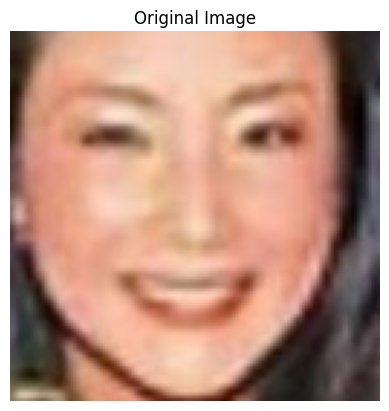

In [ ]:
index = 40
print("Original Age:", y_age[index])

# Predict age using the model
pred_age = model.predict(x_train[index].reshape(1, 128, 128, 3))[0][0]
print("Predicted Age:", pred_age)

# Display the image
plt.imshow(x_train[index])
plt.title("Original Image")
plt.axis('off')
plt.show()


Original Age: 28.0
1/1 [==============================] - 0s 22ms/step
Predicted Age: 28.321136


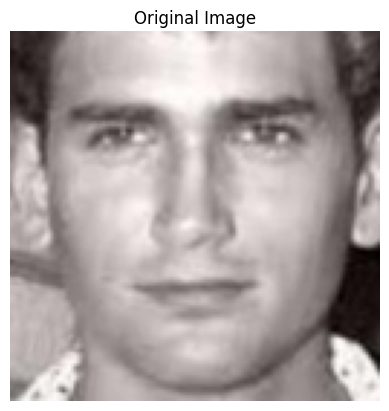

In [ ]:
index = 30
print("Original Age:", y_age[index])

# Predict age using the model
pred_age = model.predict(x_train[index].reshape(1, 128, 128, 3))[0][0]
print("Predicted Age:", pred_age)

# Display the image
plt.imshow(x_train[index])
plt.title("Original Image")
plt.axis('off')
plt.show()

In [ ]:
model.save("/content/drive/MyDrive/trained_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
